<a href="https://colab.research.google.com/github/gabikohen/topNYpizzas/blob/master/Ejercicio_de_visualizaci%C3%B3n_de_datos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [38]:
filename = '/content/drive/MyDrive/Colab Notebooks/nyc_slice_rawdata.xlsx'
df = pd.read_excel(filename)
df.head()


,Link to IG Post,Name,location_lat,location_lng,Date,Date Expanded (times in EST),Year,Price as number,Price,Style,Notes
0,https://www.instagram.com/p/CjszJ-fOP5o/,Angelo’s Pizza,40.623254,-73.937922,2022-1014,"Oct 14th 2022, 5:57:51 pm",2022,3.00,3,Plain,NaN
1,https://www.instagram.com/p/CjdcPNAufPj/,Ozone Pizzeria,40.680892,-73.842631,2022-1008,"Oct 8th 2022, 6:48:59 pm",2022,3.00,3,Plain,NaN
2,https://www.instagram.com/p/CjQdNsaOZlY/,Pino Pizza,40.600015,-73.999455,2022-1003,"Oct 3rd 2022, 5:47:23 pm",2022,2.75,2.75,Plain,NaN
3,https://www.instagram.com/p/Ci5XblnOnMA/,La Rondine,40.713335,-73.829410,2022-0924,"Sep 24th 2022, 6:34:19 pm",2022,3.25,3.25,Plain,NaN
4,https://www.instagram.com/p/CiiLAtkON_1/,Rony's Fresh Pizza,40.748251,-73.992350,2022-0915,"Sep 15th 2022, 6:23:16 pm",2022,1.00,1,Plain,NaN


Paso hacer un EDA

Compruebo si hay duplicados y cuantos

In [39]:
df.duplicated().sum()

0

Compruebo que los elimine

Compruebo si hay nullos y cuantos

In [41]:
df.isna().sum()

Link to IG Post                   0
Name                              0
location_lat                      0
location_lng                      0
Date                              0
Date Expanded (times in EST)      0
Year                              0
Price as number                   0
Price                             0
Style                             0
Notes                           457
dtype: int64

In [42]:
df.Notes.unique() # valores unico de la columna

array([nan, '2nd Visit', '3rd Visit'], dtype=object)

Podemos visualizar que la columna notes es un obj con nan, 2nd visit, 3rd visit. Por ende los nan los voy remplazar por 1fr visit suponiendo que es 1 visita.

In [43]:
df["Notes"].fillna("1frs Visit",inplace=True)


In [44]:
df.Notes.unique()

array(['1frs Visit', '2nd Visit', '3rd Visit'], dtype=object)

In [45]:
df.Notes.isnull().sum()

0

In [47]:
print(df.dtypes)

Link to IG Post                  object
Name                             object
location_lat                    float64
location_lng                    float64
Date                             object
Date Expanded (times in EST)     object
Year                              int64
Price as number                 float64
Price                            object
Style                            object
Notes                            object
dtype: object


In [70]:
df['Price'].unique()

array([3, 2.75, 3.25, 1, 3.5, 3.35, '$3.00', '$2.50', 3.81, 4.35, '$3.25',
       3.26, '$2.75', 4.5, 3.76, '$3.24', '$2.00', 4.9, 3.27, '$3.50',
       '$5.00', '$4.00', '$5.50', 2.5, 6.53, 4.25, 3.2, 2, 4.36, 4,
       '$1.00', '$3.81', '$3.75', '$2.25', '$4.50', '$4.40', '$1.50',
       '$4.25', '$3.80', '$2.65', '$4.08', '$3.85', '$2.95', '$2.45',
       '$3.95', '$5.25', '$3.15', '$1.75', '$3.55', '$2.85', '$3.79',
       '$2.71', '$1.09', '$3.05', '$2.55'], dtype=object)

In [76]:
df['Price'] = [float(value.replace('$', '')) if isinstance(value, str) else value for value in df['Price']]

# Imprimir la columna 'Price' actualizada
print(df['Price'])


0      3.00
1      3.00
2      2.75
3      3.25
4      1.00
       ... 
459    2.75
460    2.75
461    2.25
462    2.55
463    2.00
Name: Price, Length: 464, dtype: float64


In [77]:
# convierto price en int

df['Price'] = df['Price'].astype(int)

In [78]:
print(df.columns)

Index(['Link to IG Post', 'Name', 'location_lat', 'location_lng', 'Date',
       'Date Expanded (times in EST)', 'Year', 'Price as number', 'Price',
       'Style', 'Notes'],
      dtype='object')


Quiero mostrar el precio para las pizzas Angelo’s Pizza

In [80]:
result = df.groupby('Name')['Price'].value_counts()
result

Name                     Price
$1.00 Pizza              1        1
11B Express              3        1
2 Bros Pizza             1        2
2 Bros. Pizza            1        2
44st Pizza               1        1
                                 ..
Woodhaven Cafe Pizzeria  1        1
Yankee J-Z Pizza Inc     3        1
Yankee Pizza             2        1
Zazzy's Pizza            3        1
iPizza NY                3        1
Name: Price, Length: 424, dtype: int64

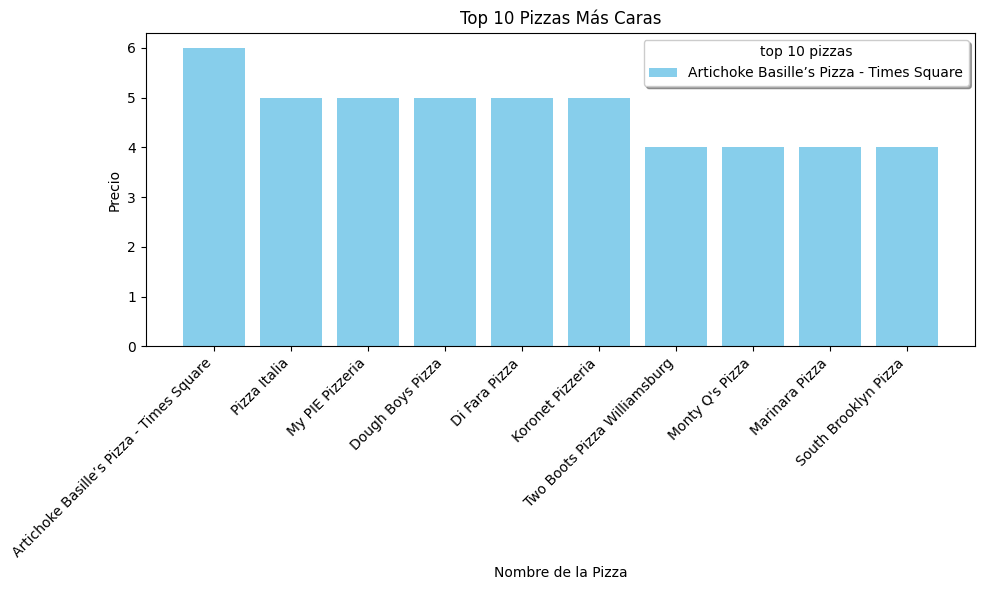

In [109]:
df_sorted = df.sort_values(by="Price", ascending=False)
top_10_pizzas = df_sorted.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_pizzas["Name"], top_10_pizzas["Price"], color='skyblue')
plt.xlabel('Nombre de la Pizzeria')
plt.ylabel('Precio')
plt.title('Top 10 Pizzas Más Caras')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de las pizzas para mejor legibilidad
plt.tight_layout()
plt.legend(top_10_pizzas["Name"], framealpha=1, shadow=True, title="top 10 pizzas")
# Mostrar el gráfico
plt.show()


Este gráfico de barras proporciona una rápida visualización de las diez pizzas más caras, destacando la variación de precios entre las diferentes pizzerías.